In [46]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import parsec as pc
from scipy.special import i0,i1,k0,k1
from scipy.constants import G
from scipy.optimize import curve_fit

In [47]:
msun=1.989e+30
kpc=1e+3*pc


In [48]:
def vdisk(r,sigma0,rd):
    const=4*np.pi*G*sigma0*rd
    sec=i0(r/(2*rd))*k0(r/(2*rd))-i1(r/(2*rd))*k1(r/(2*rd))
    temp=1e-3*np.sqrt(np.abs(const*(r/(2*rd))**2*sec))
    return temp

In [49]:
dir="/home/esha/Documents/anurag/nav/sparc"
column_names=["Rad","Vobs","errV","Vgas","Vdisk","Vbul","SBdisk","SBbul"]
gal_data=[]
for gal in os.listdir(dir):
    
    if gal.endswith(".csv"):
        
        gal_path=os.path.join(dir,gal)
        gal_df=pd.read_csv(gal_path,names=column_names)
        gal_df['Galaxy']=os.path.splitext(gal)[0]
        gal_data.append(gal_df)
combined_df=pd.concat(gal_data,ignore_index=True)

In [50]:
for col in column_names:
    combined_df[col]=pd.to_numeric(combined_df[col])

In [51]:
uniq_gal=combined_df['Galaxy'].unique()
col=plt.cm.rainbow(np.linspace(0,1,len(uniq_gal)))

                   

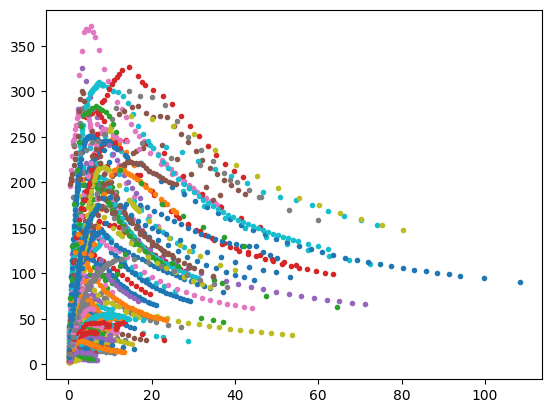

In [52]:
uniq_gal=combined_df['Galaxy'].unique()
for gal in uniq_gal:
    vg=combined_df[combined_df['Galaxy']==gal]['Vdisk']
    rd=combined_df[combined_df['Galaxy']==gal]['Rad']
    if vg.sum()>0:
        plt.scatter(rd,vg,marker='.')

In [53]:
with open('metadata.txt','r') as file:
    lines=file.readlines()
data=[]
for line in lines:
    field=line.strip().split()
    data.append(field)

    

In [54]:
Md=[]
rd=[]
for i in range(len(data)):
    if data[i][0] in uniq_gal:
        try:
            Md.append(pd.to_numeric(data[i][12]))
            rd.append(pd.to_numeric(data[i][11]))
        except ValueError:
            print("gal not found")

In [55]:
type(uniq_gal)

numpy.ndarray

In [56]:
set(uniq_gal).difference(set(gl))

set()

In [57]:
#kg/m^2=md
#r0=m
def fit_disk(df,gal_name, Md, rd, kpc, msun, pc):
    gal_data=df[df['Galaxy']==gal_name]
    r=gal_data['Rad'].values*kpc
    vd=gal_data['Vdisk'].values
    m0=(Md[uniq_gal.tolist().index(gal_name)]*msun)/(pc**2)
    r0=rd[uniq_gal.tolist().index(gal_name)]*kpc
    initial_guess=[0.1*m0,r0]
    #bounds=((0.1*m0,0.1*r0),(10*m0,10*rd))
    bounds = ((0.1 * m0, 0.1 * r0), (100 * m0, 100 * r0))
    
   # print(f"Fitting galaxy: {gal_name}")
   # print(f"Initial guess: {initial_guess}")
    #print(f"Bounds: {bounds}")
    #print(f"r: {r}")
    #print(f"vd: {vd}")
    popt,pcov=curve_fit(vdisk,r,vd,p0=initial_guess,bounds=bounds)
    return popt
    

In [58]:
Md_fit=[]
rd_fit=[]
output_file="disk_fit.txt"
with open(output_file,'w') as f:
    f.write("Galaxy\tMd\tRd_fit\n")
    for gal in uniq_gal:
        disk_opt=fit_disk(combined_df,gal, Md, rd, kpc, msun, pc)
        Md_fit.append(disk_opt[0])
        rd_fit.append(disk_opt[1])
        f.write(f"{gal}\t{disk_opt[0]}\t{disk_opt[1]}\n")



/tmp/ipykernel_151579/555131819.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


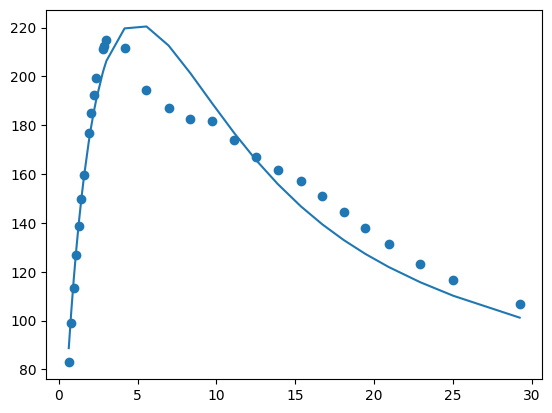

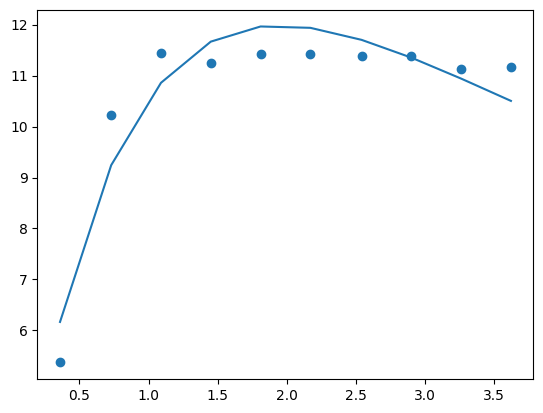

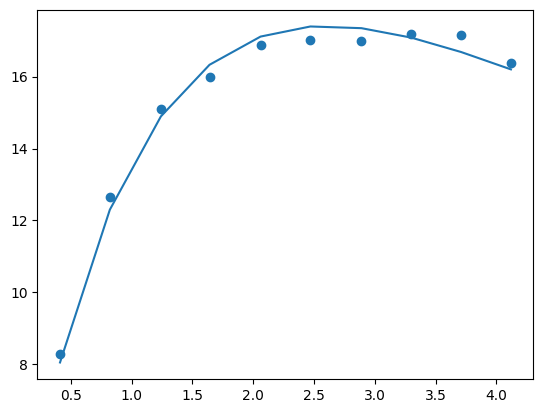

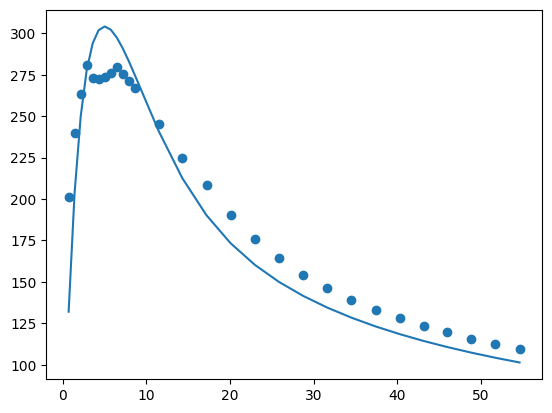

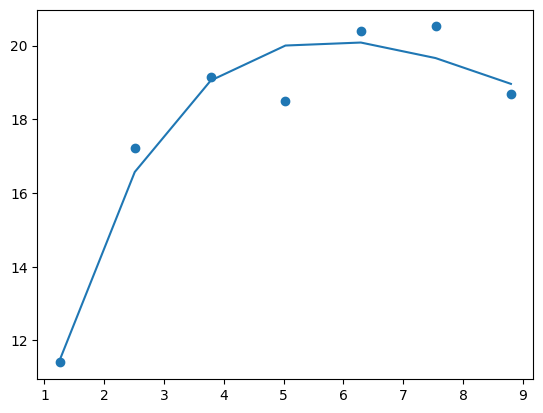

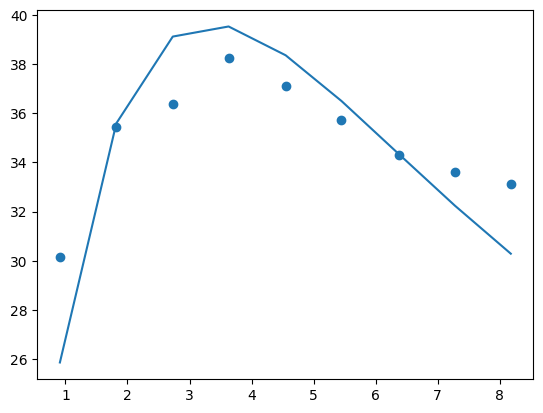

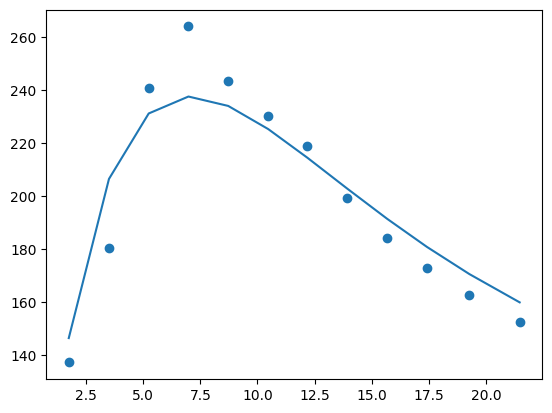

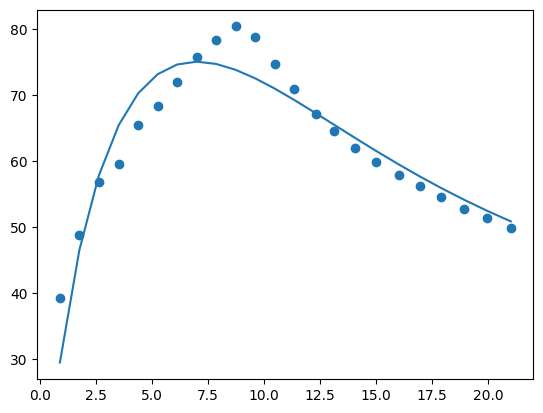

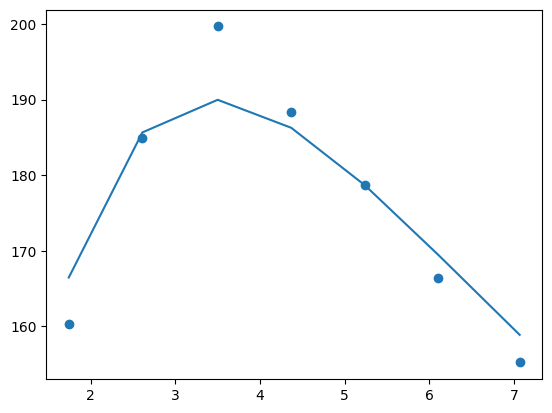

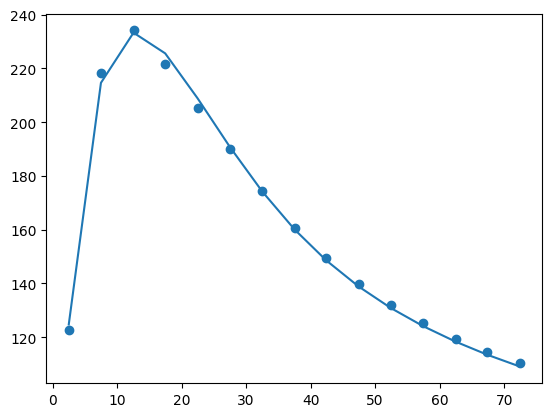

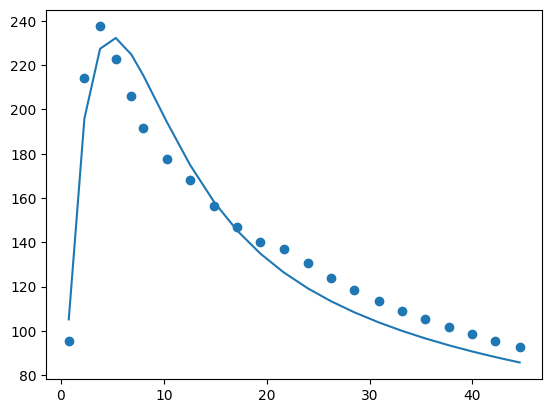

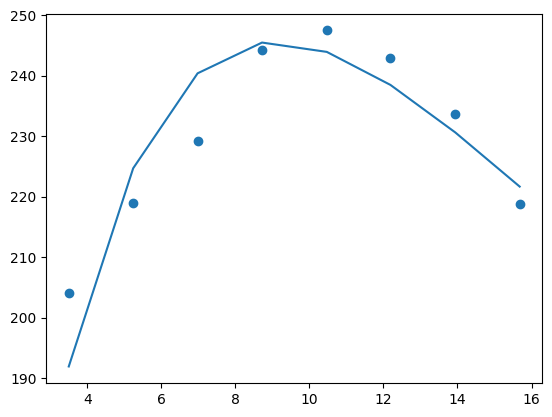

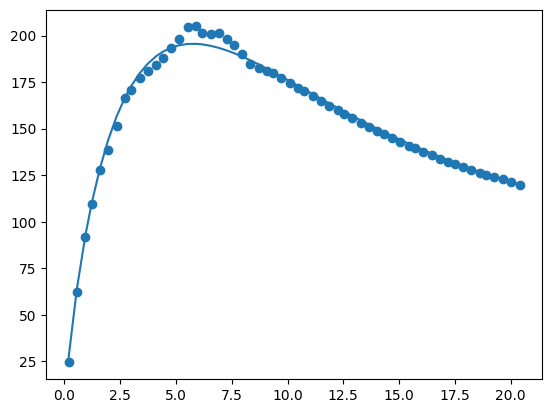

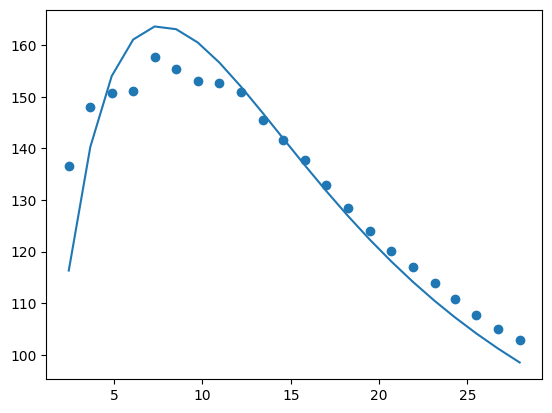

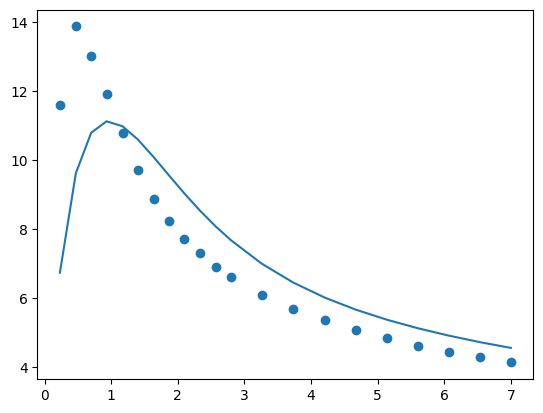

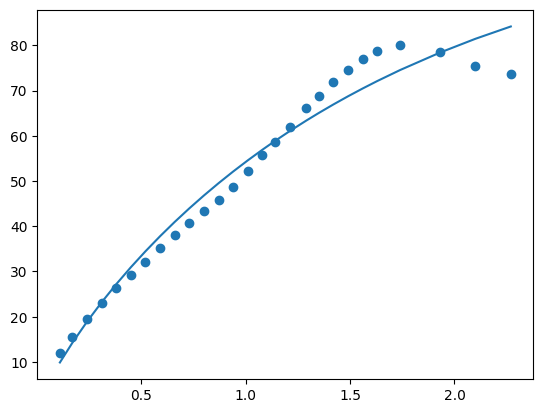

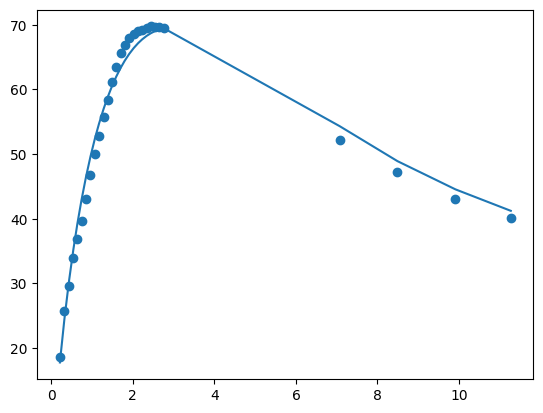

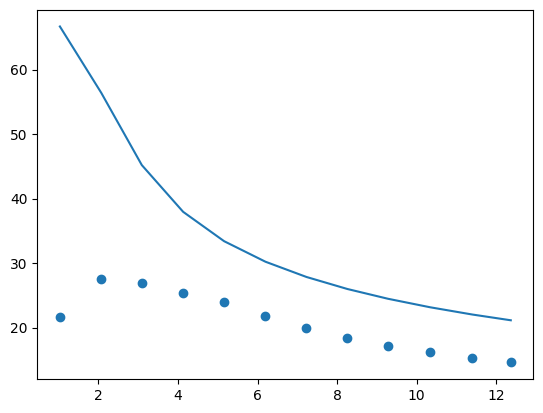

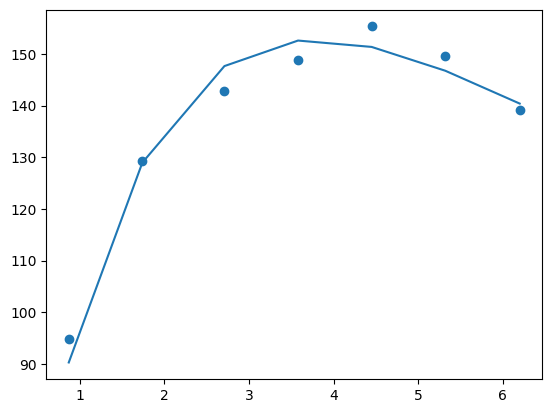

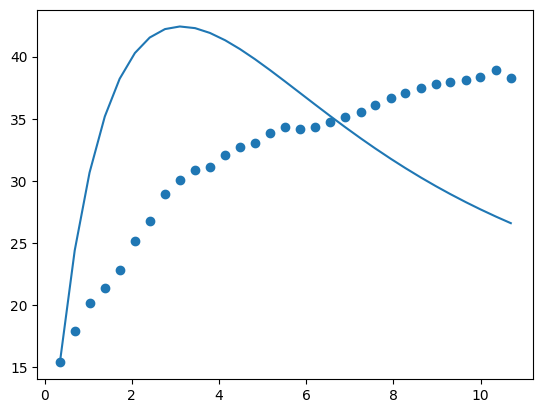

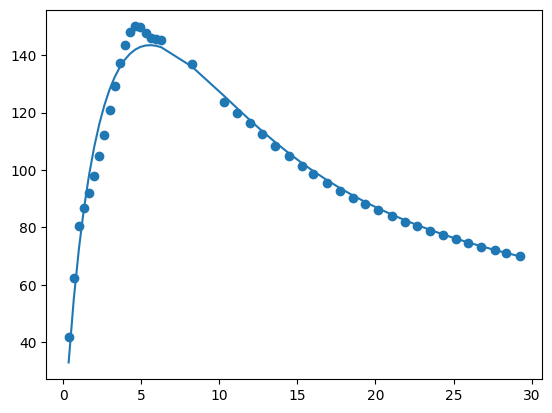

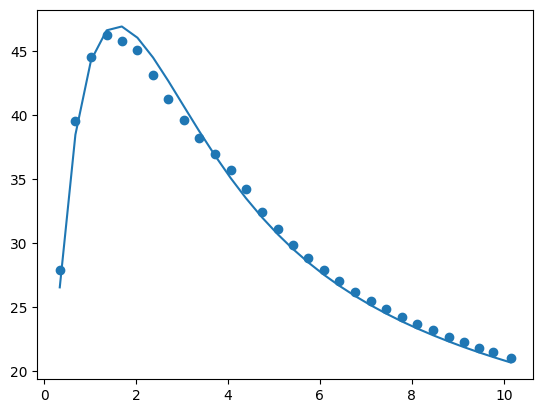

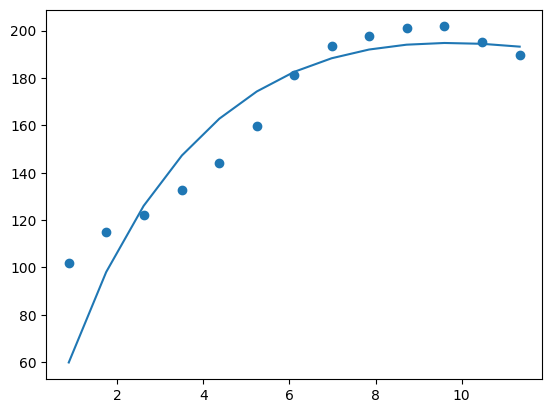

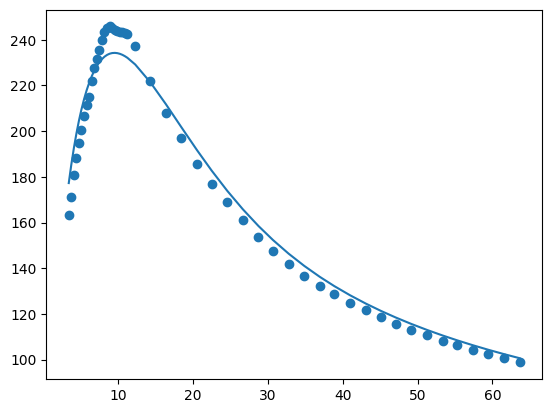

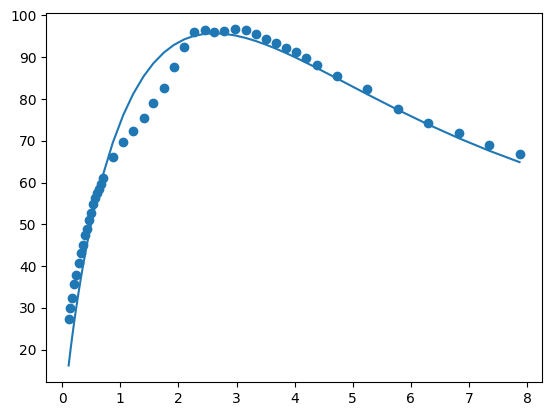

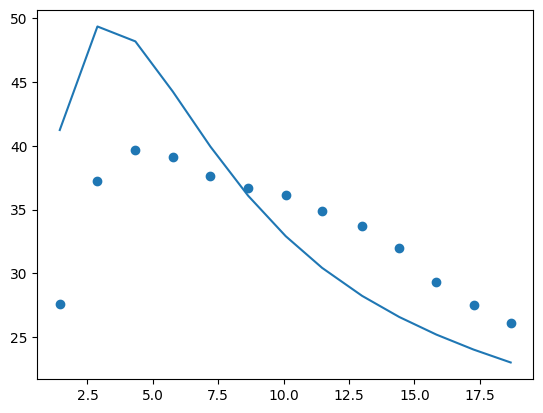

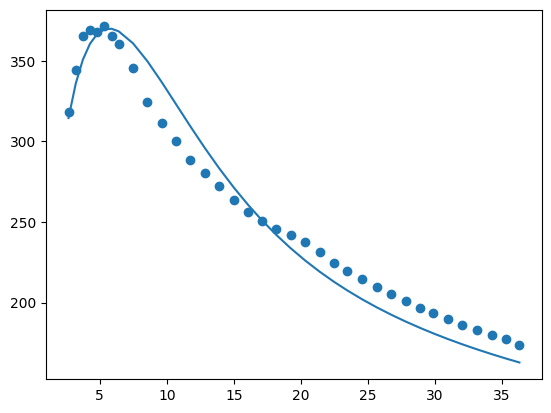

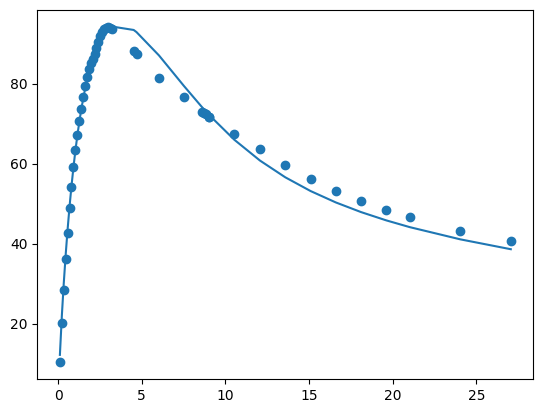

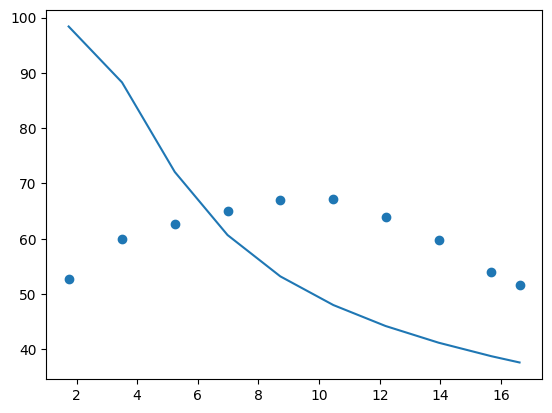

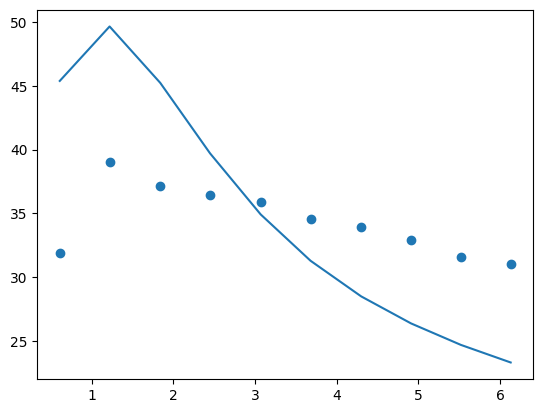

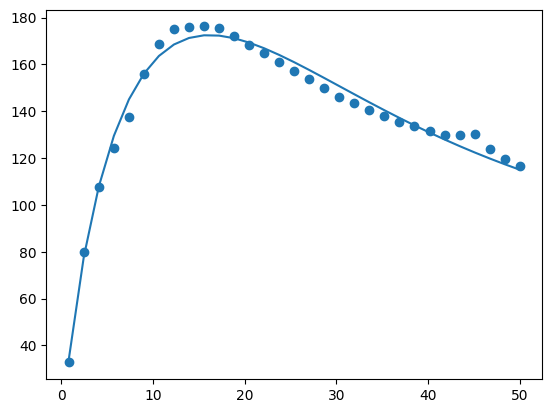

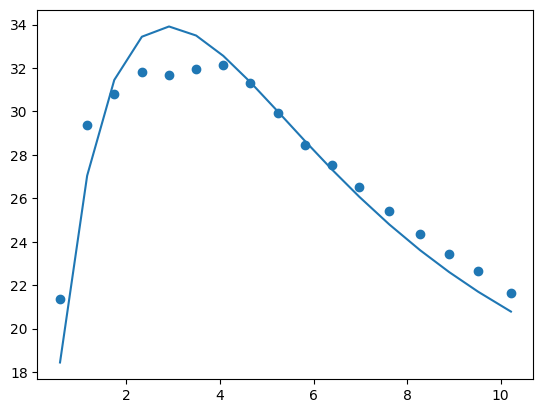

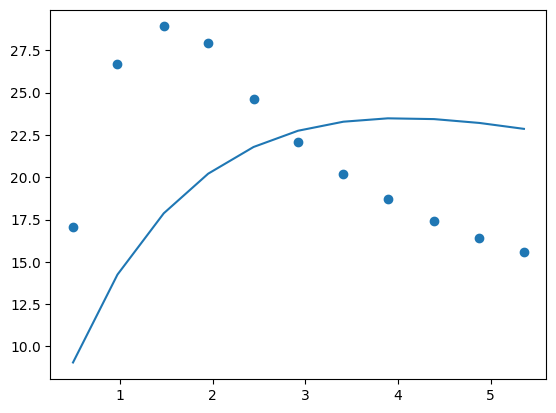

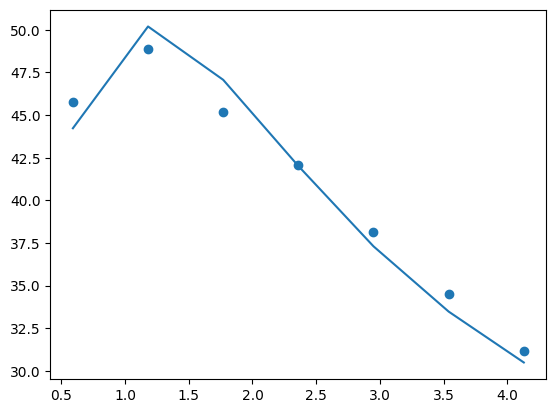

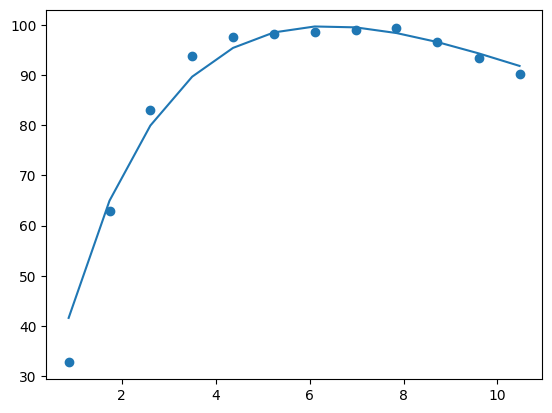

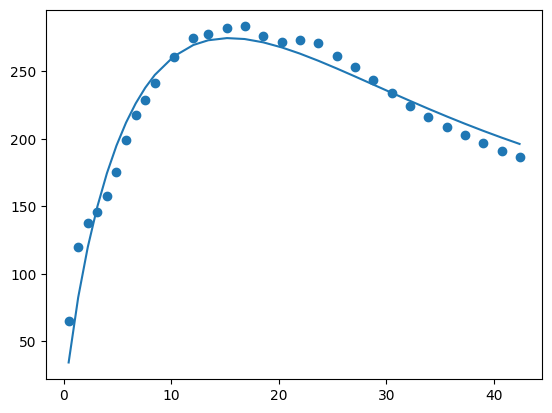

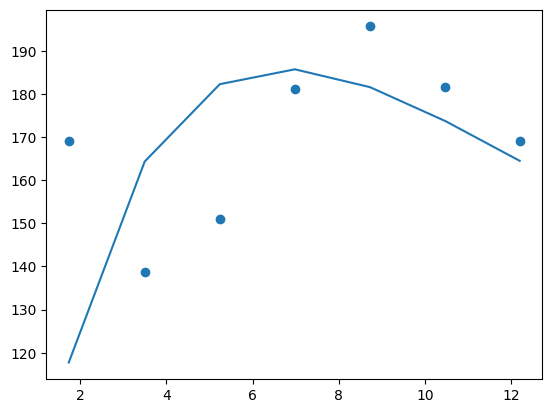

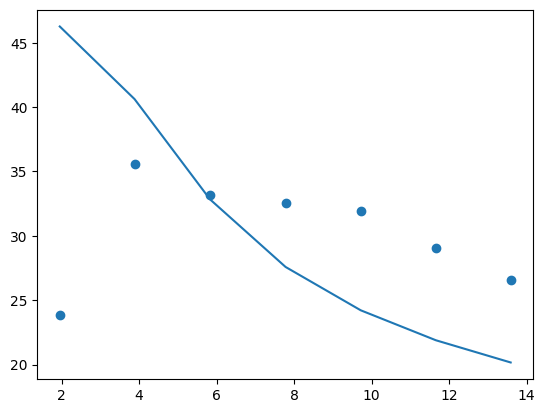

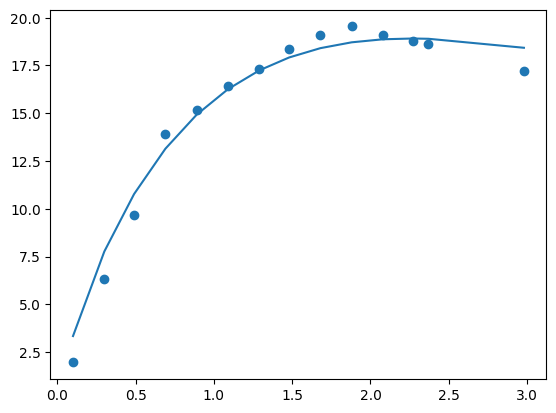

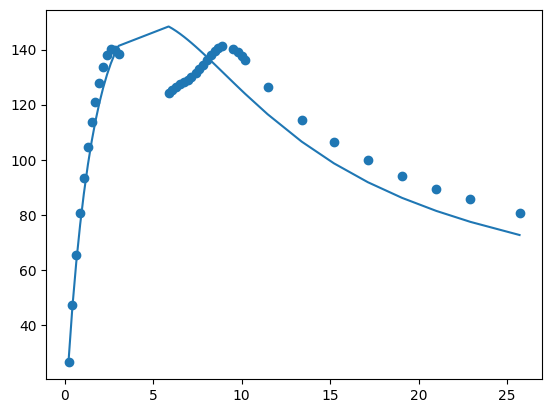

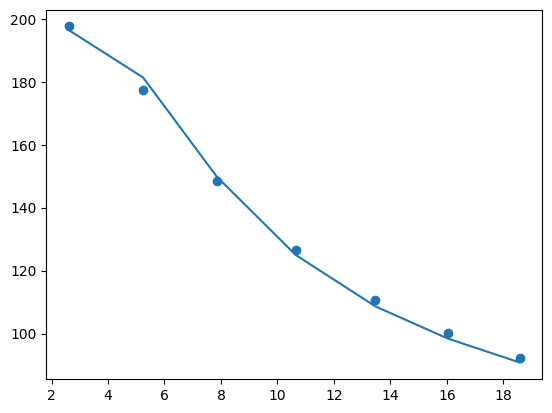

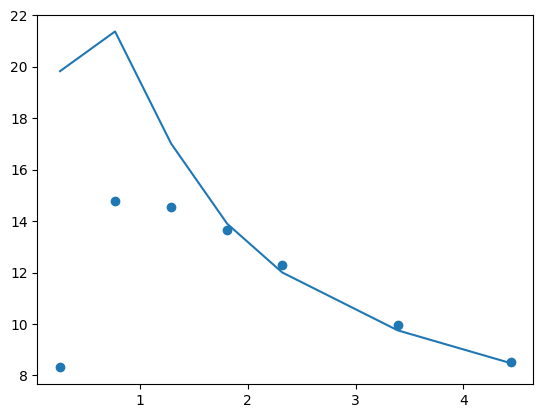

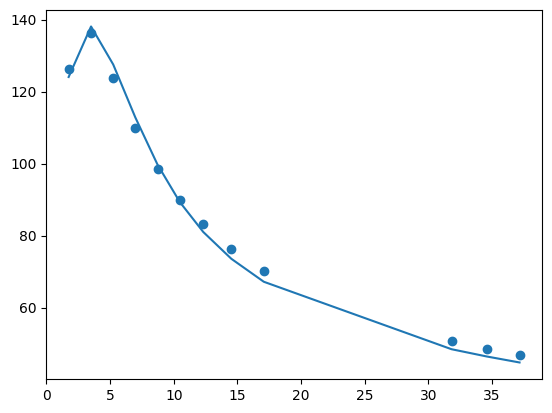

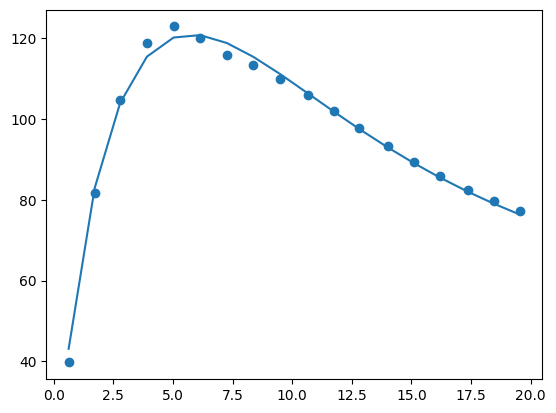

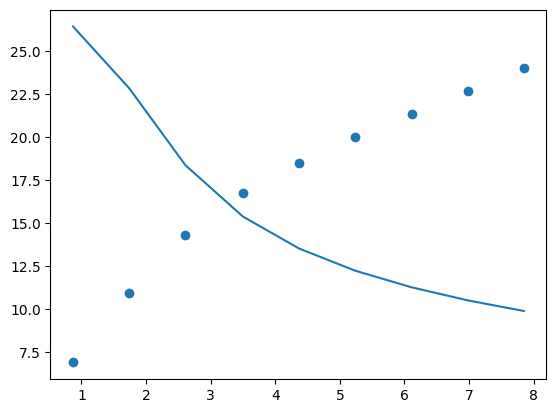

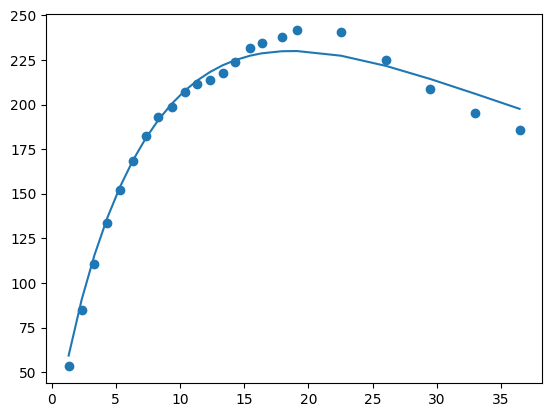

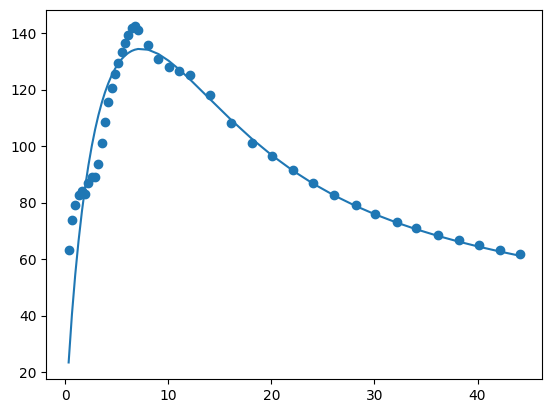

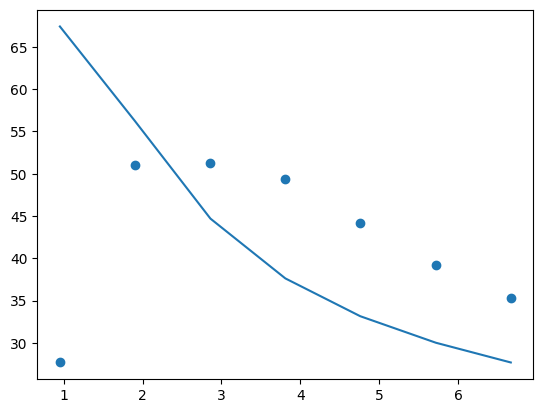

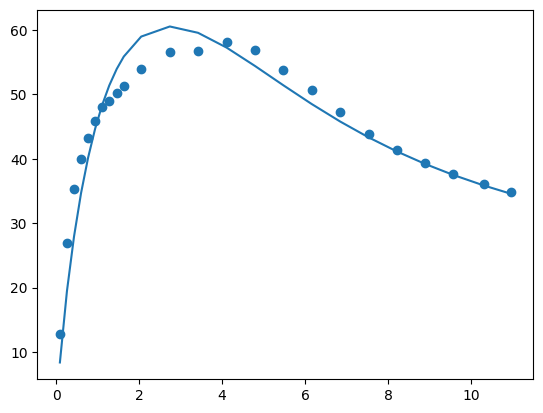

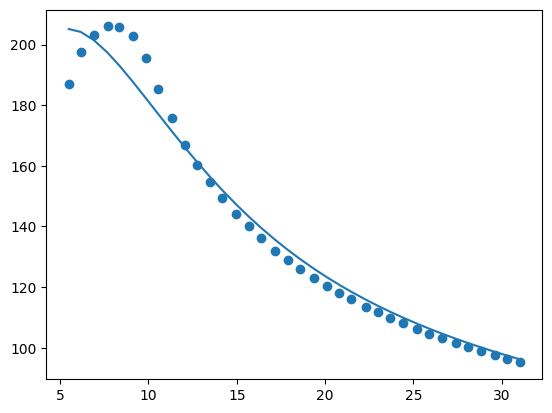

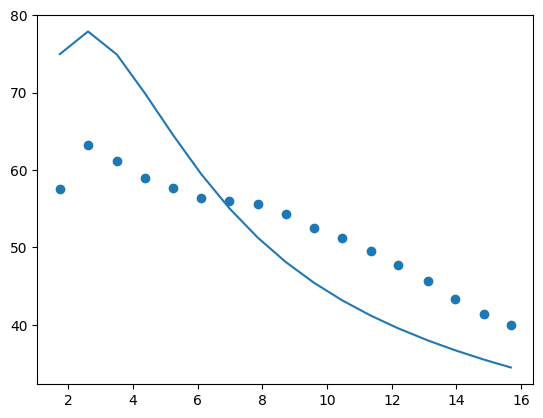

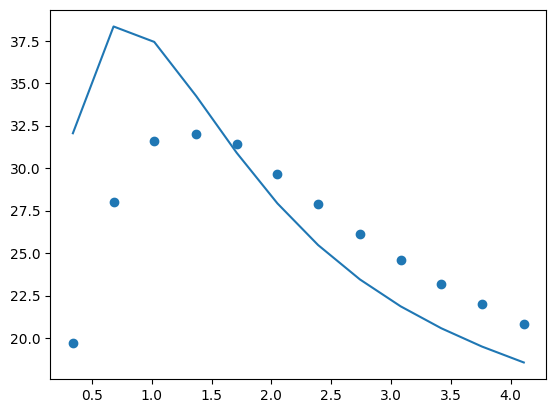

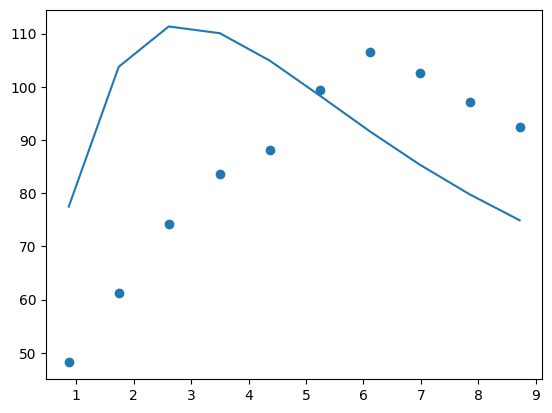

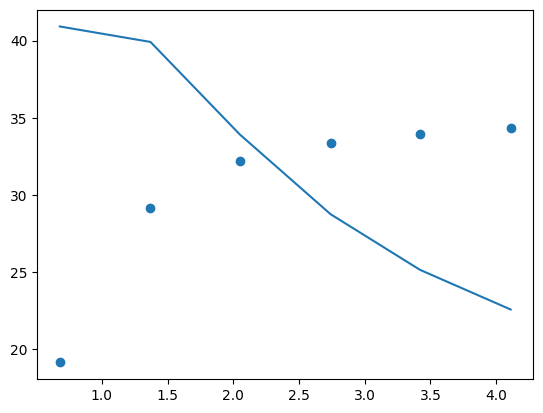

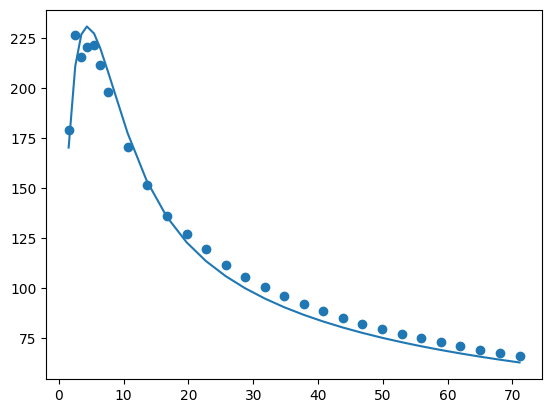

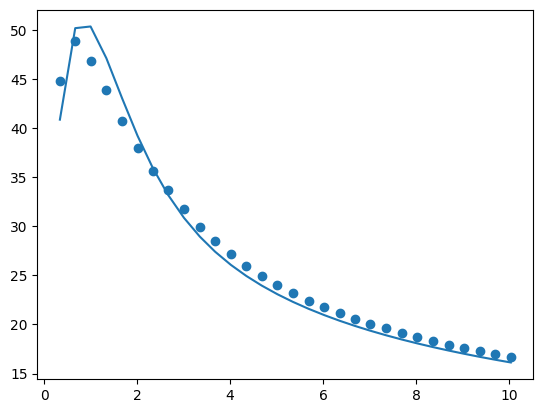

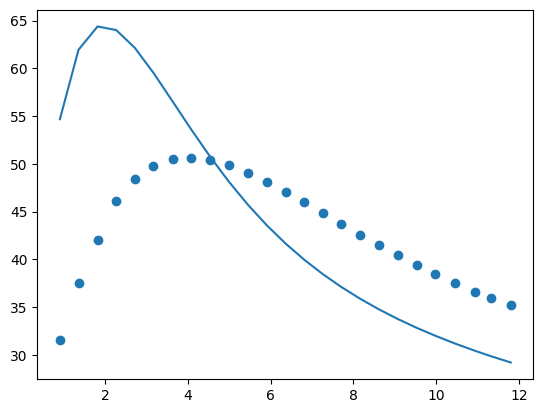

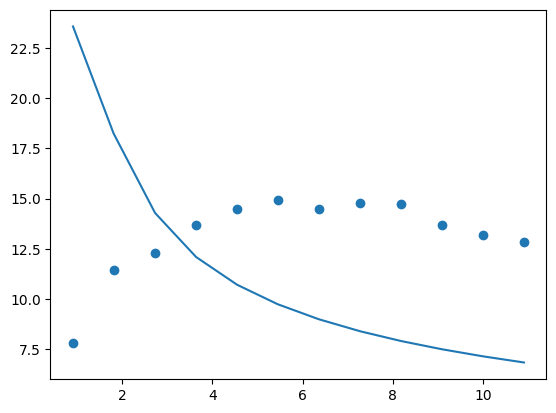

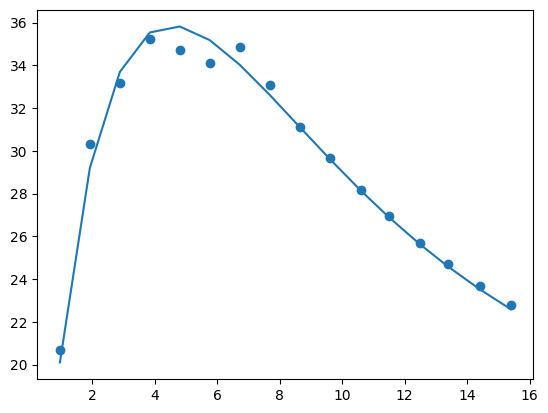

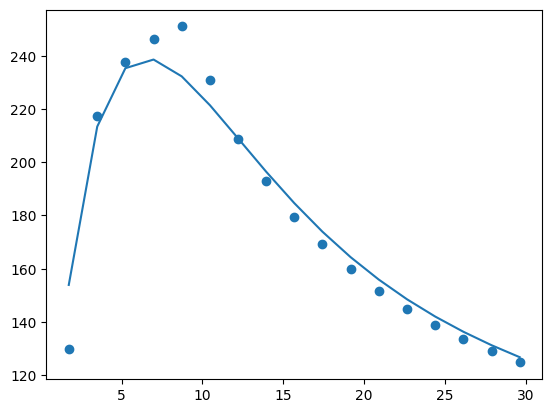

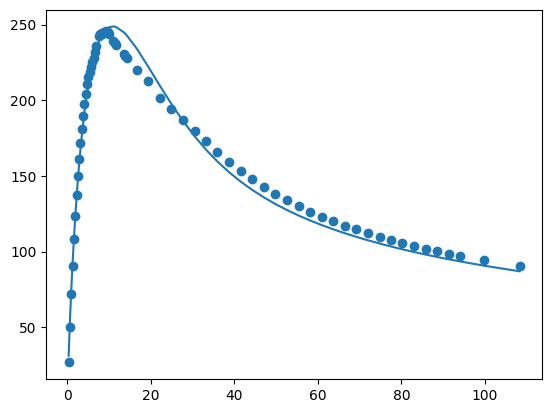

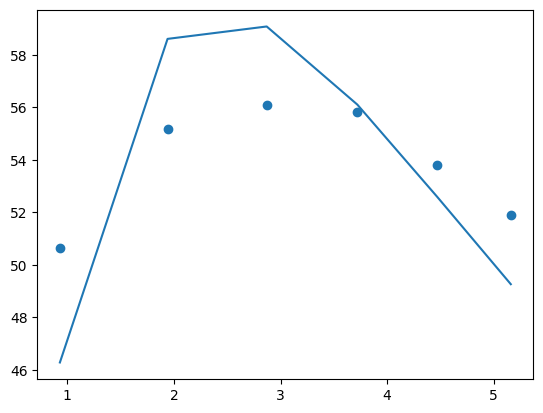

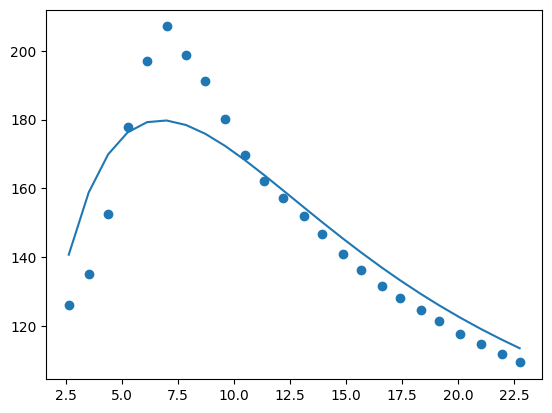

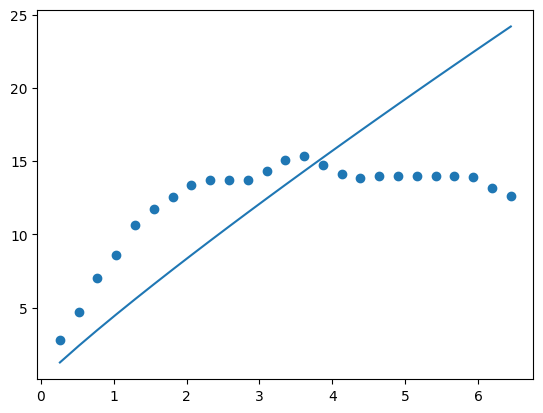

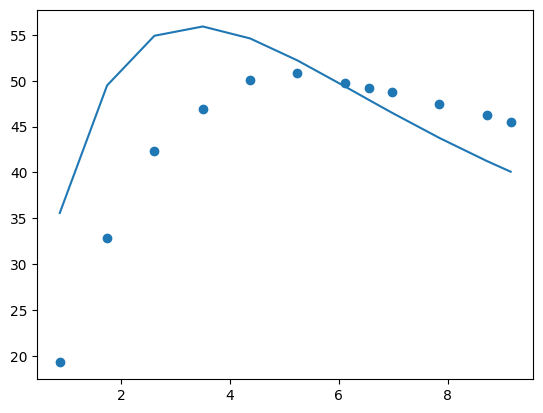

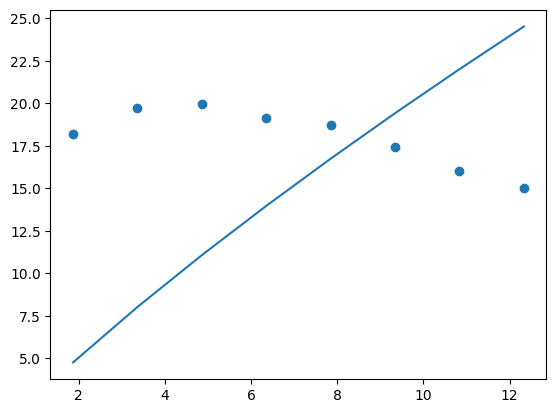

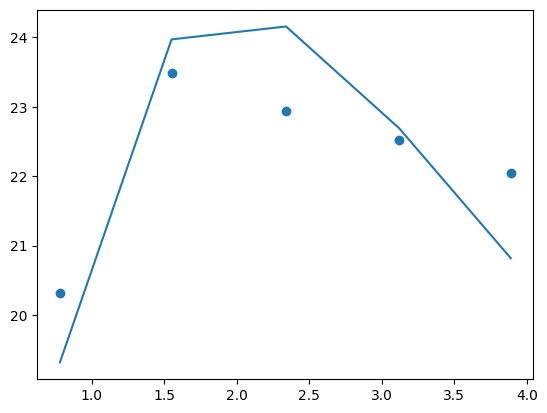

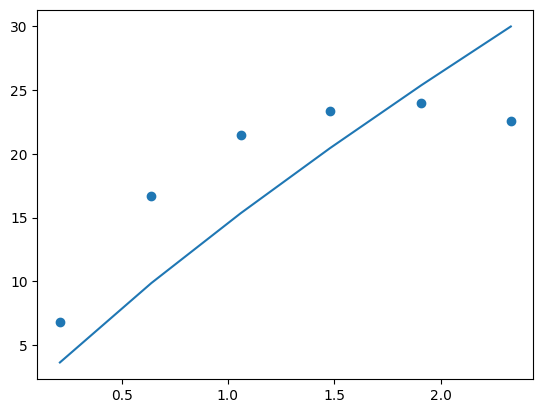

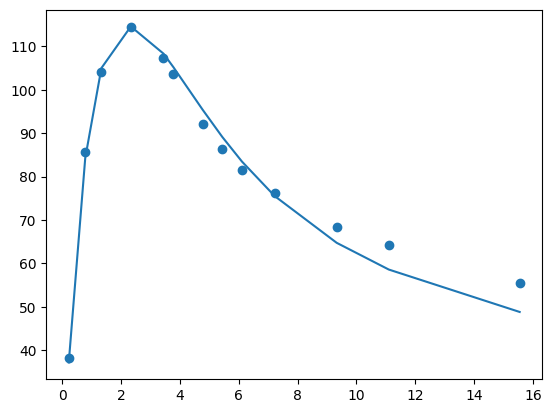

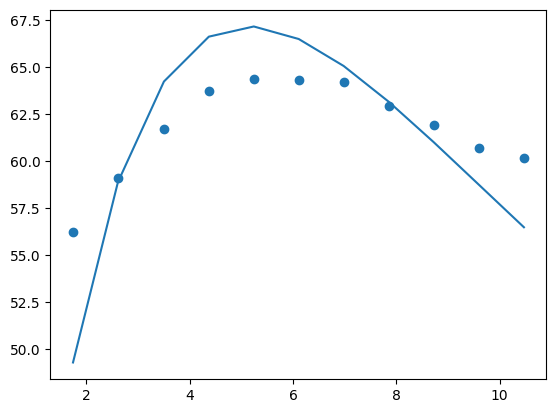

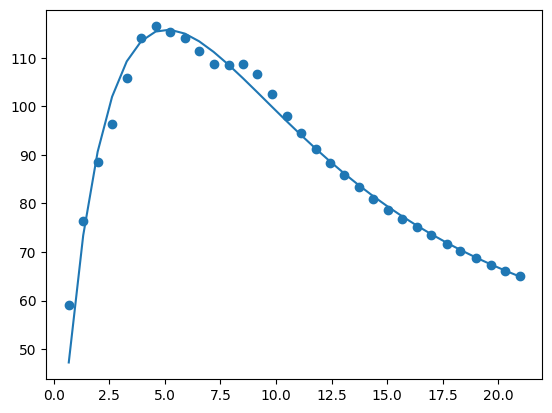

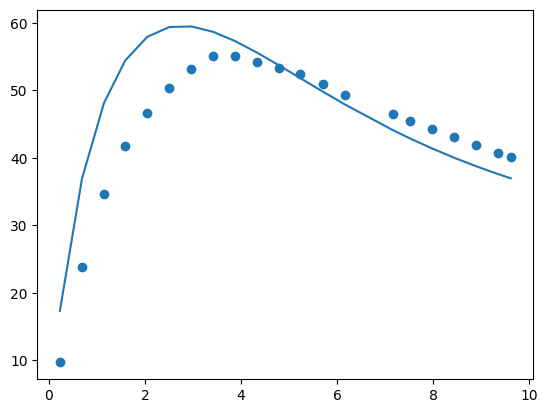

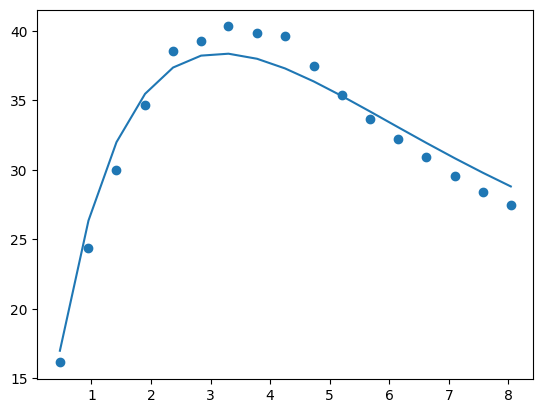

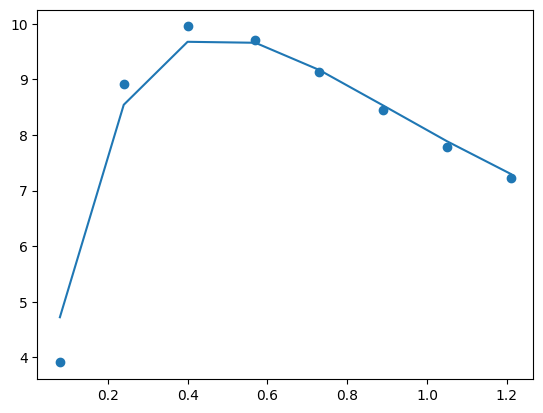

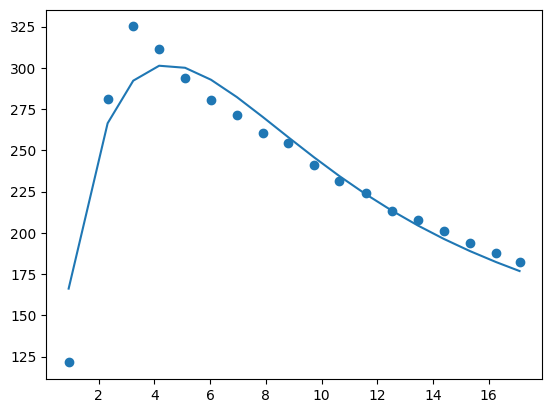

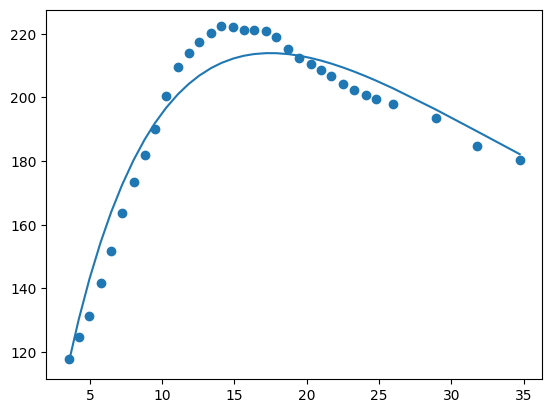

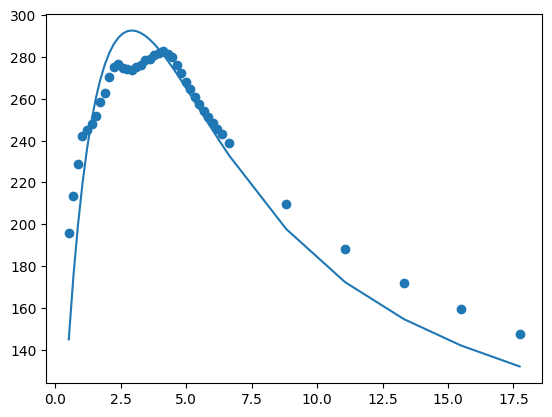

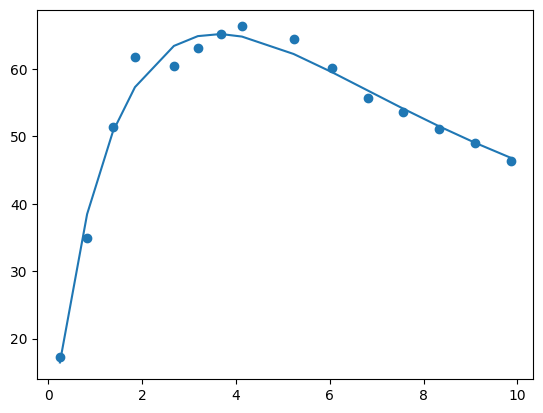

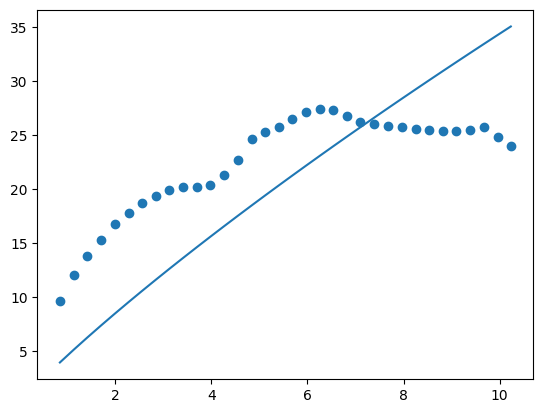

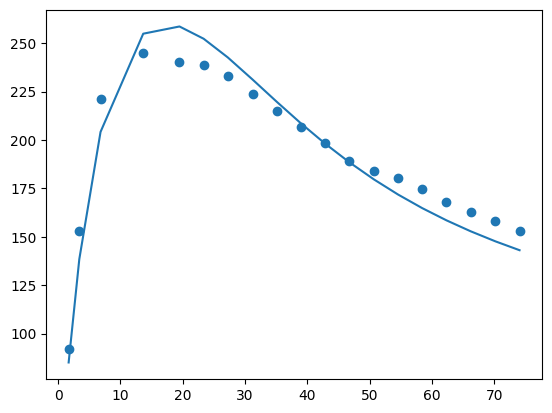

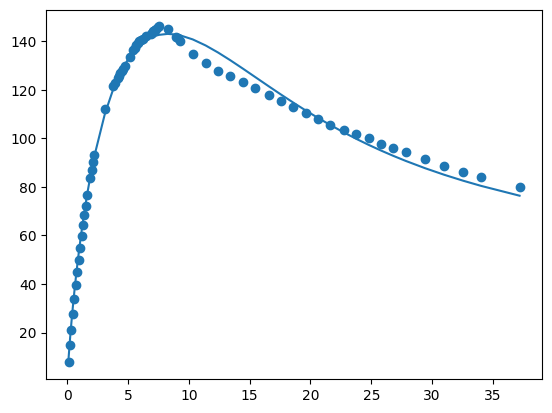

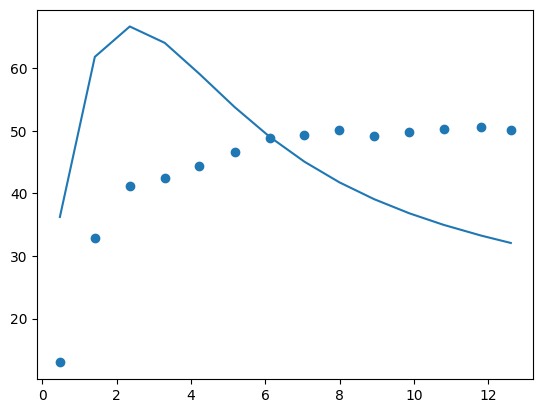

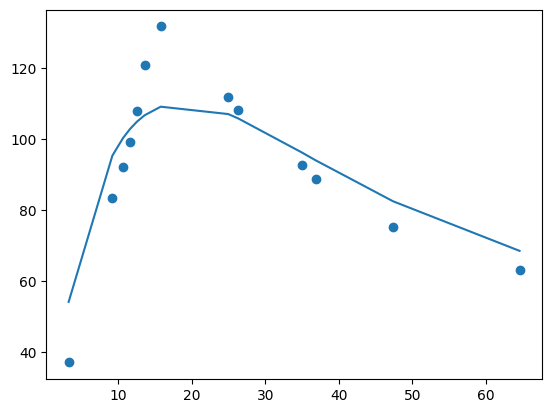

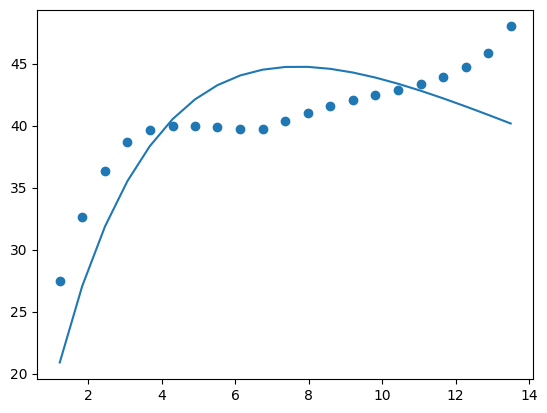

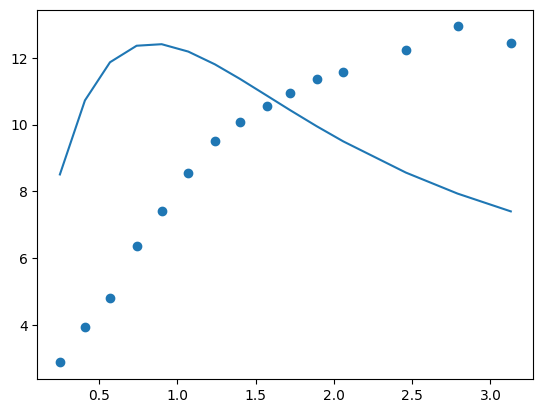

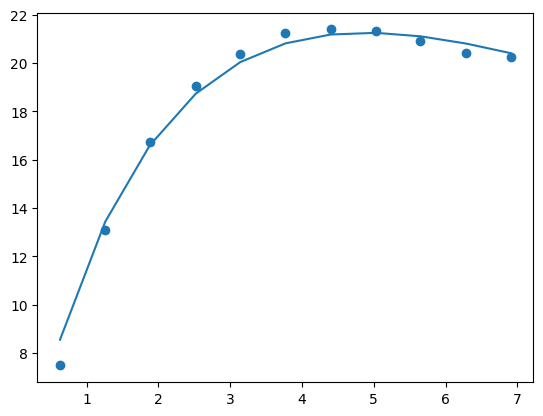

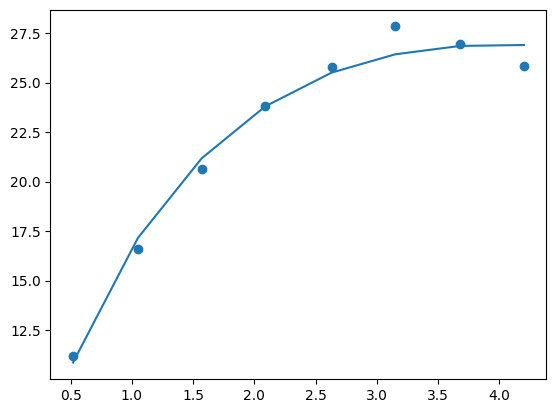

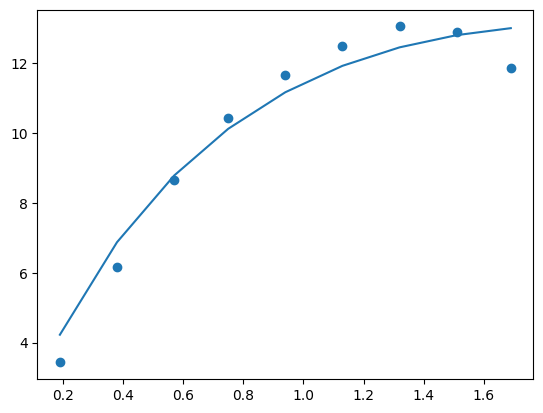

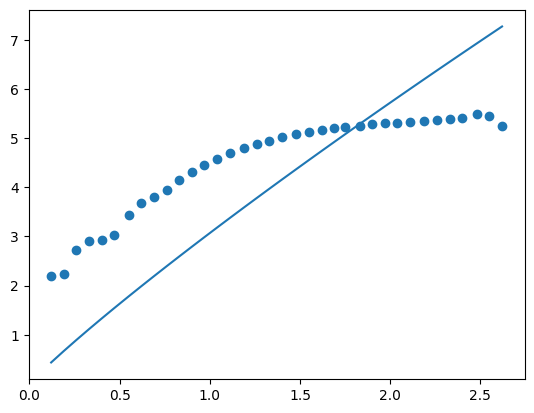

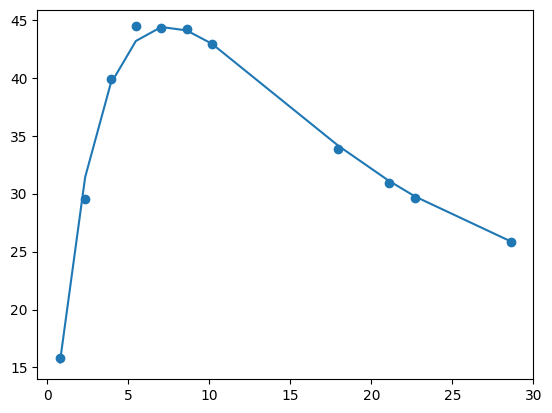

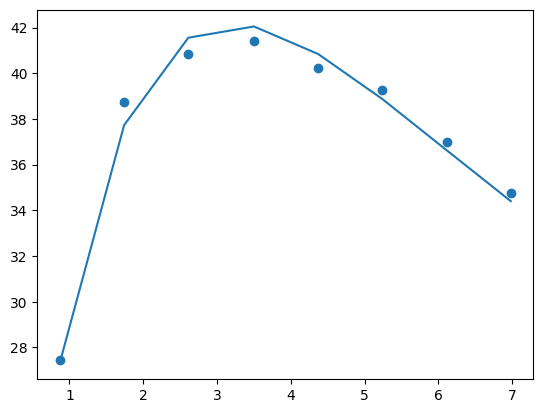

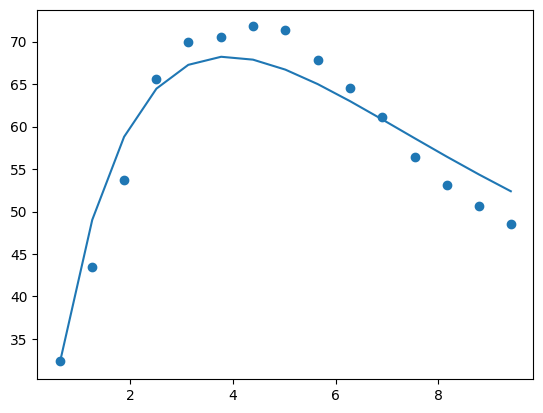

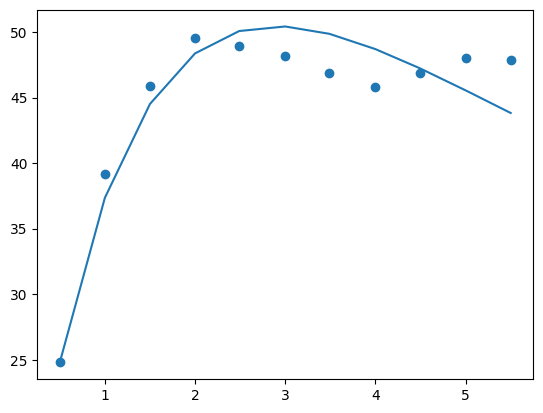

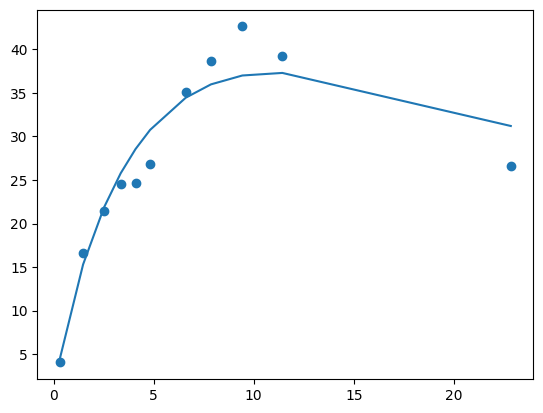

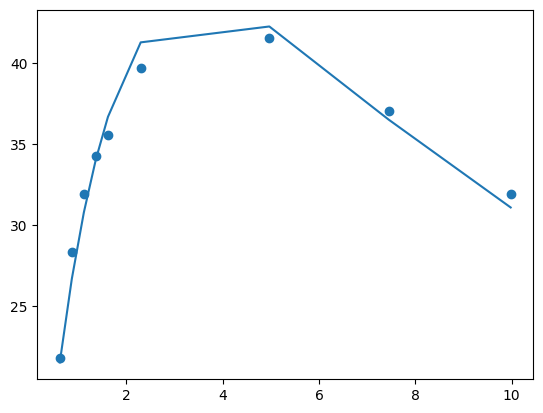

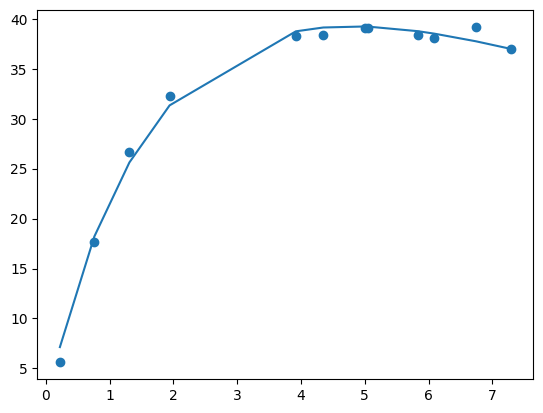

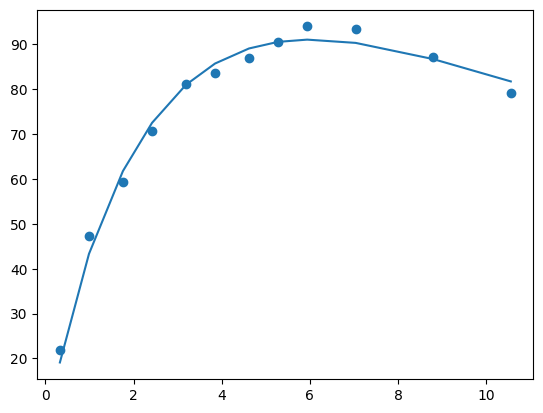

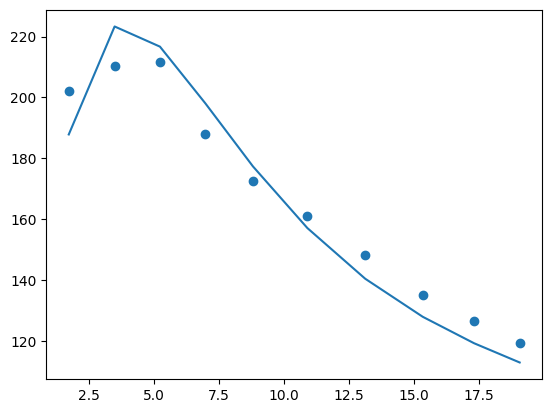

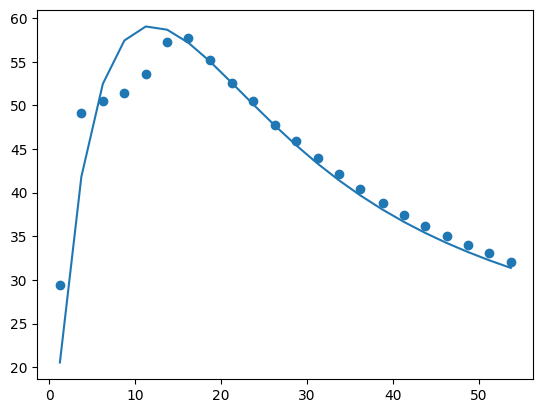

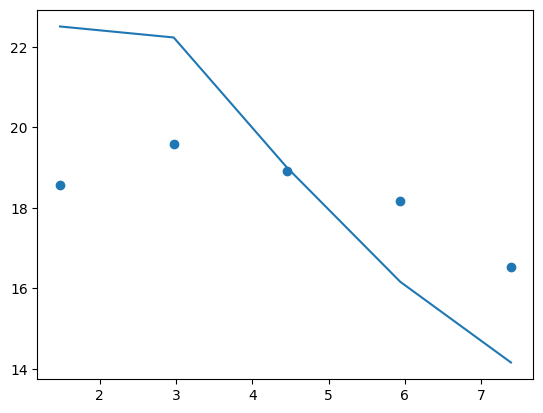

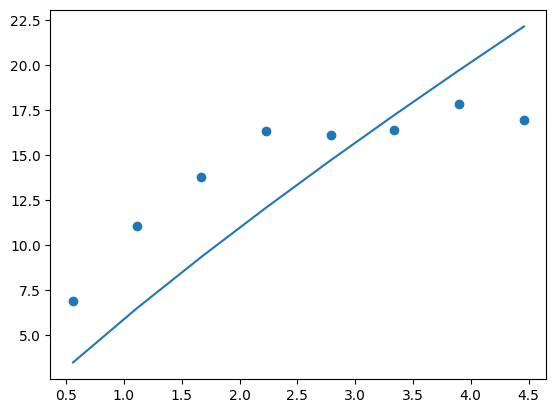

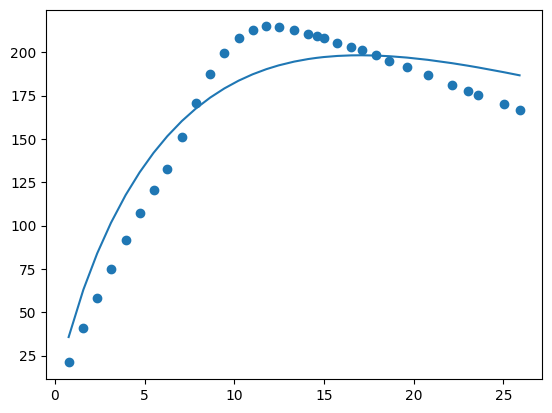

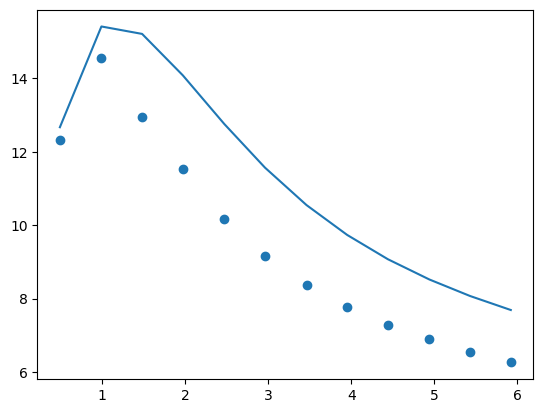

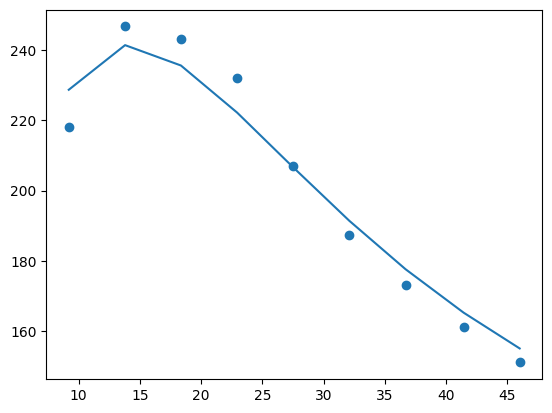

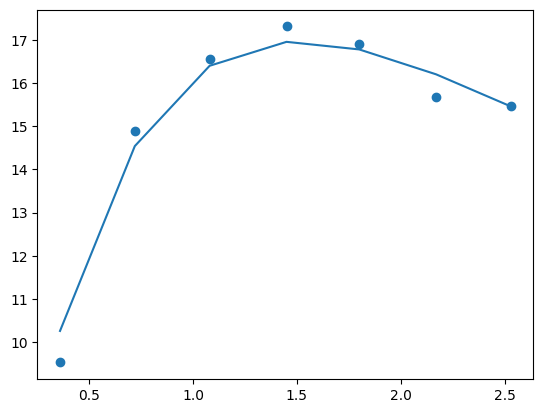

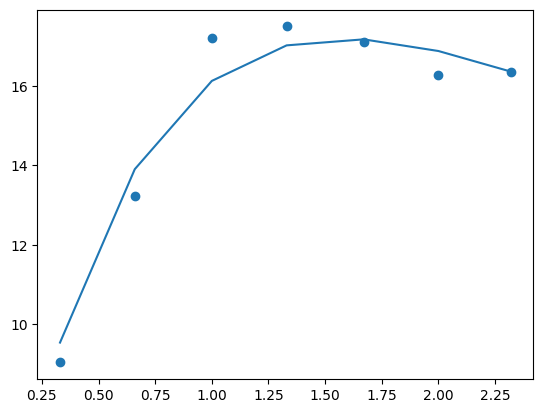

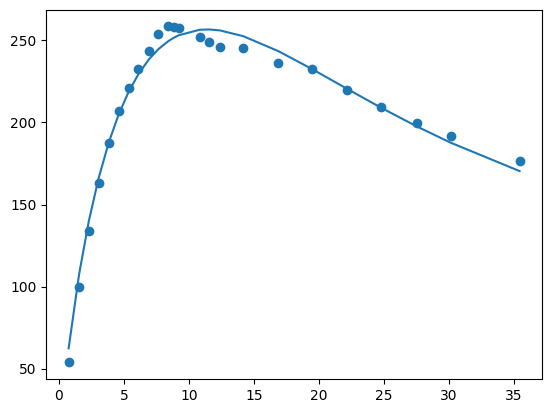

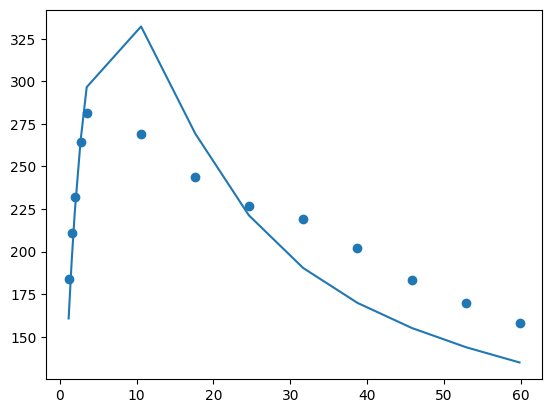

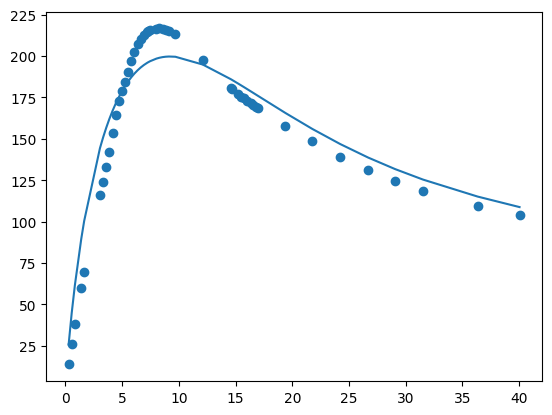

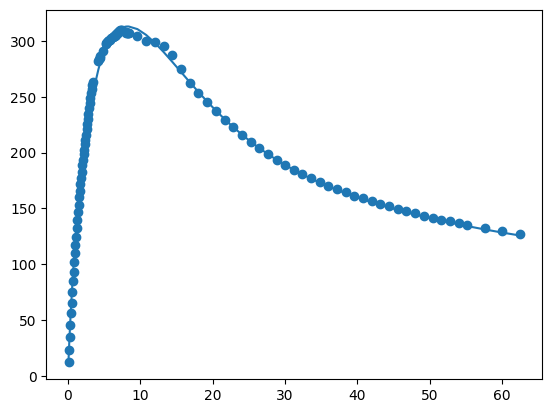

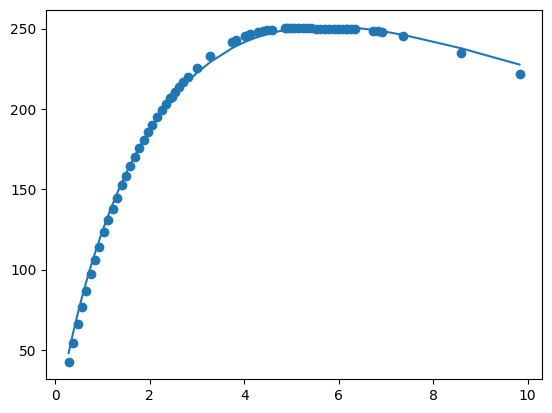

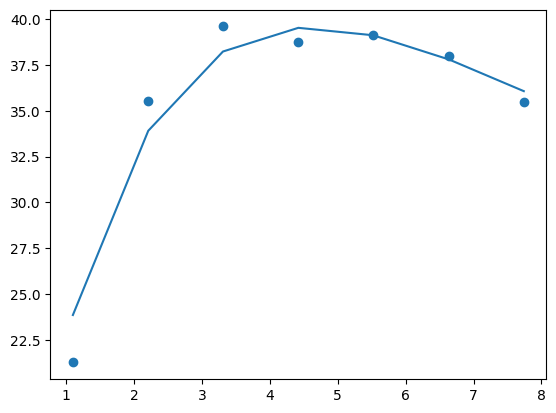

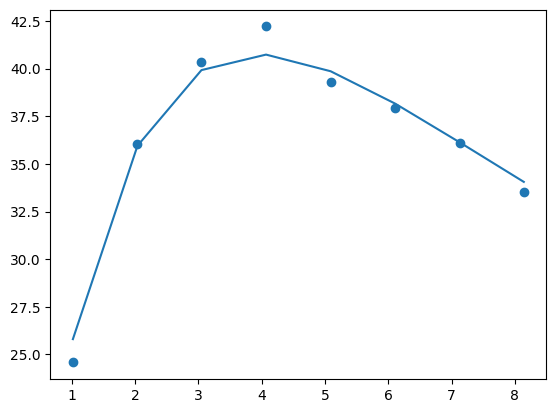

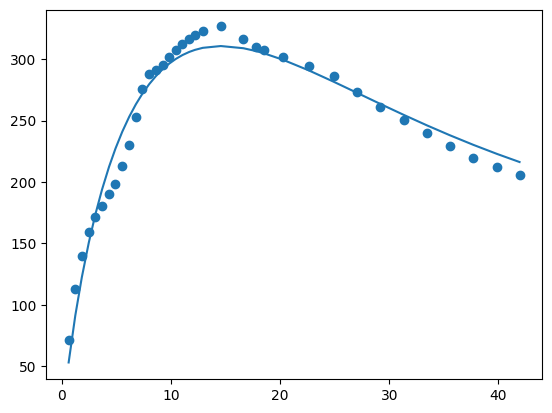

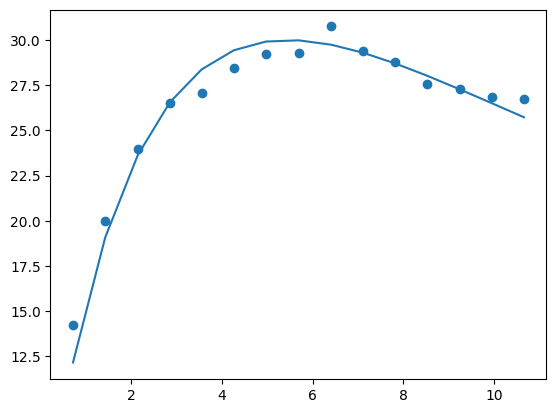

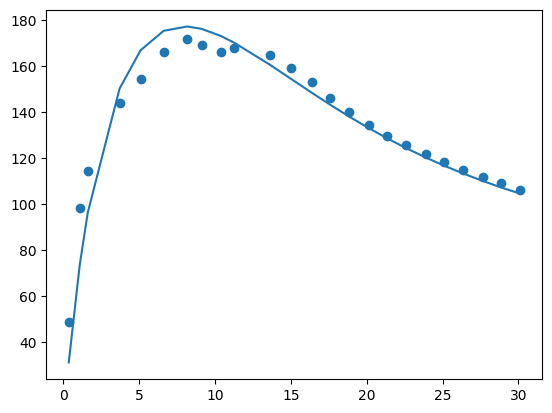

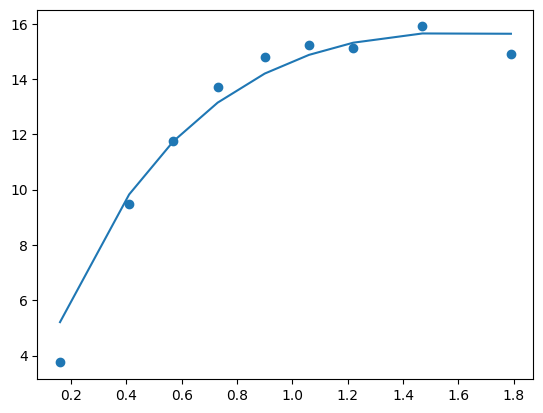

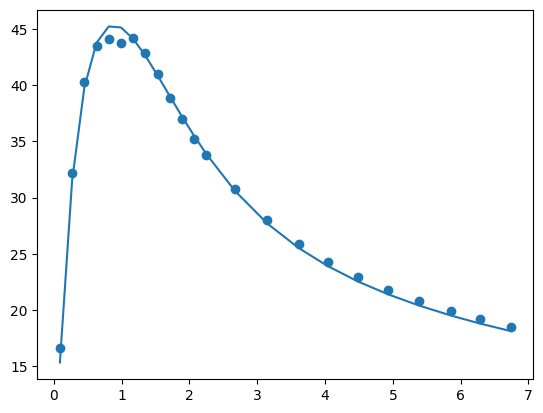

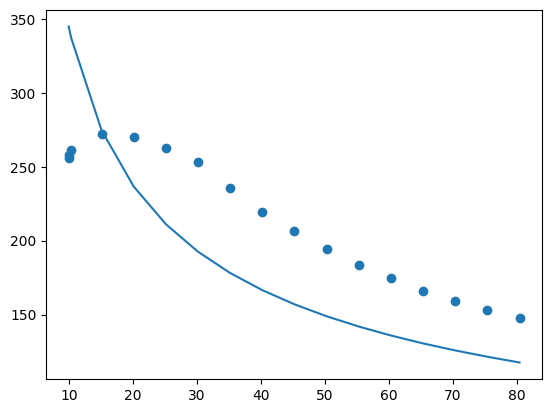

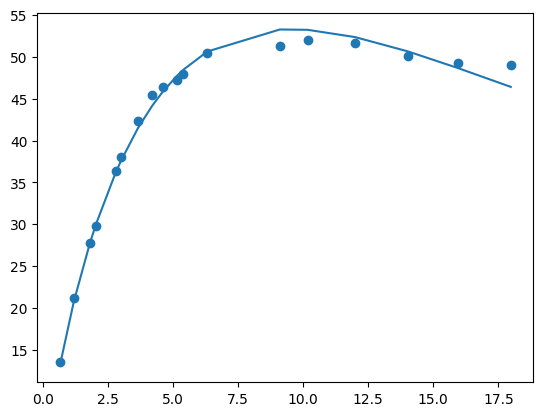

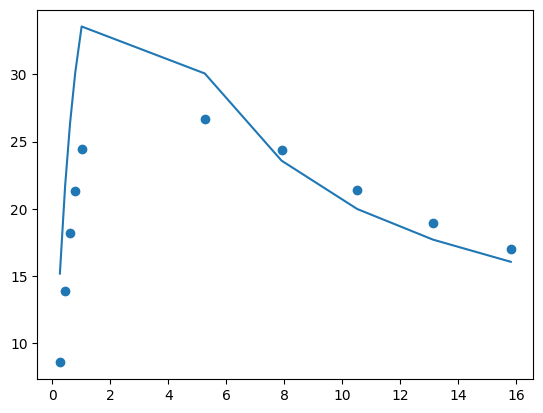

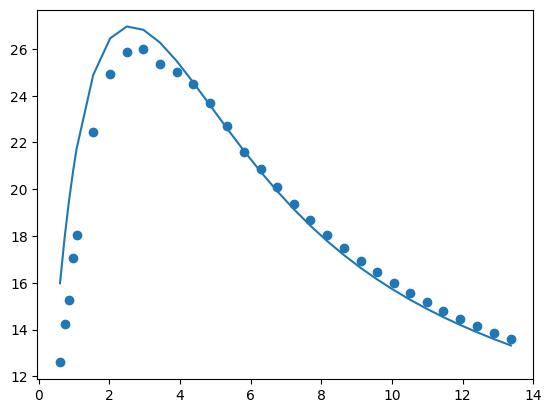

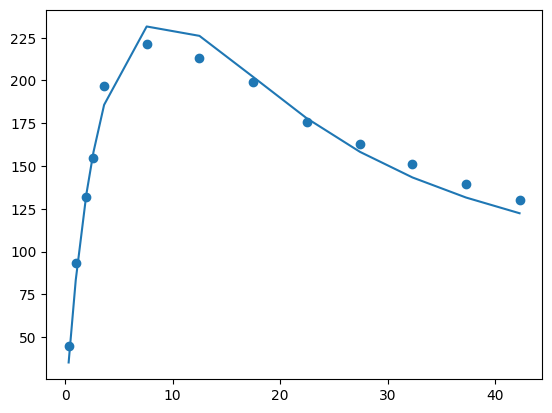

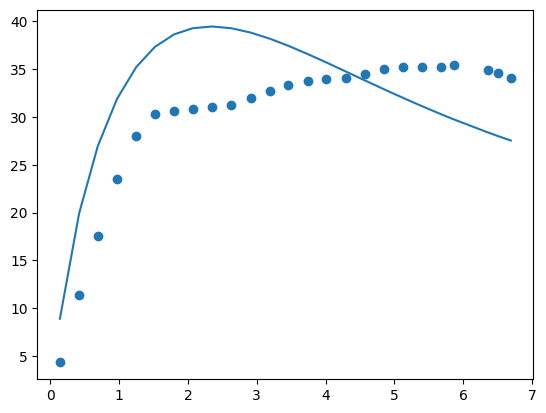

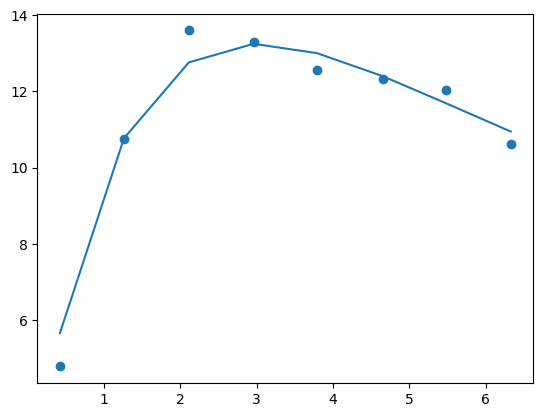

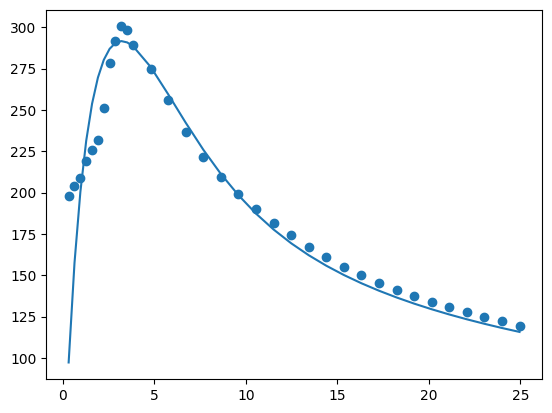

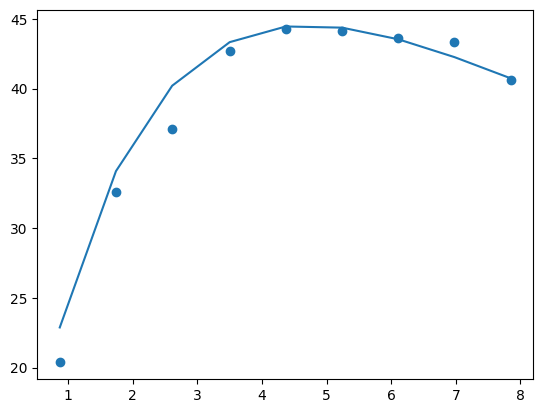

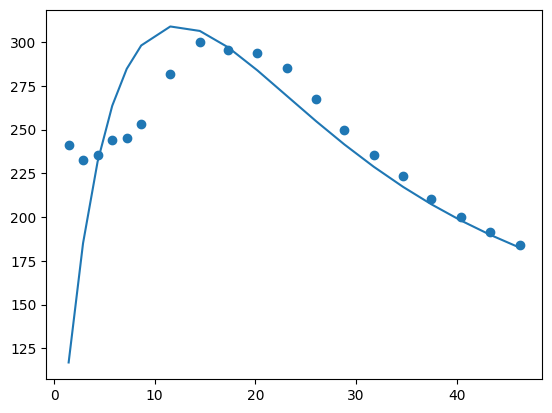

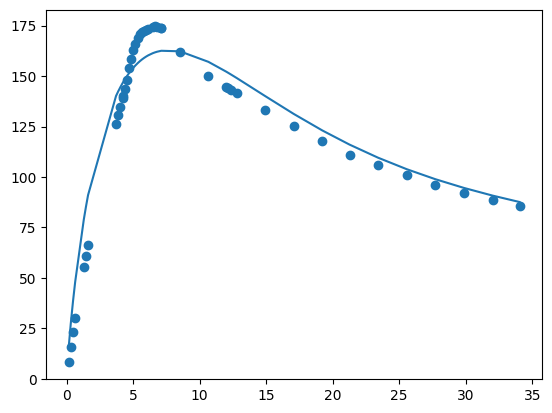

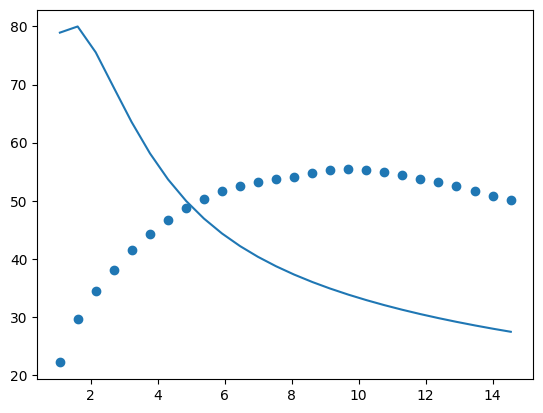

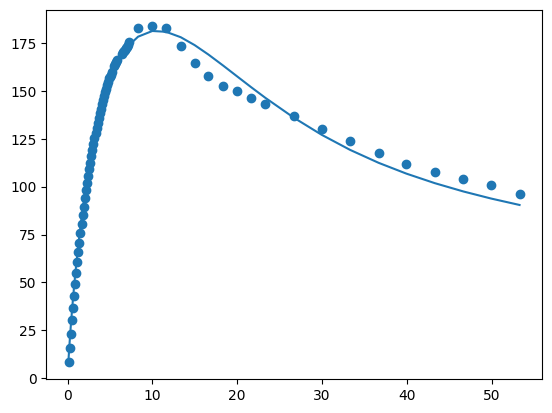

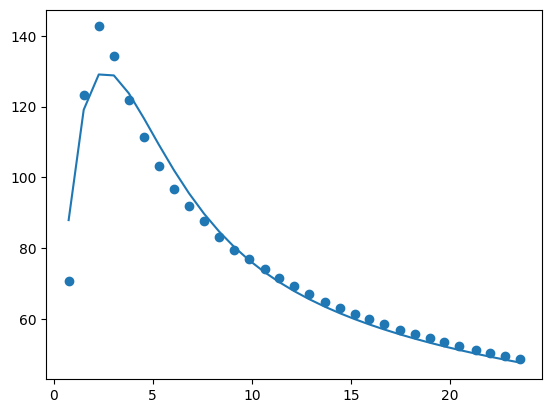

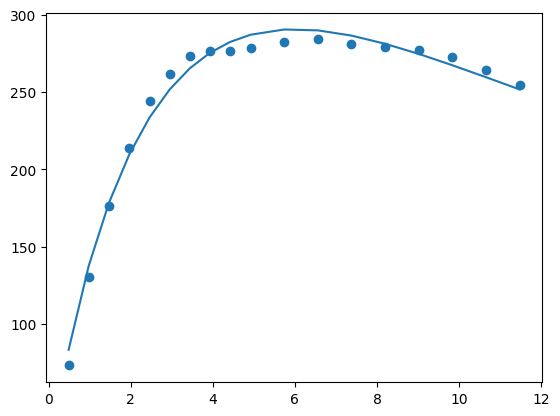

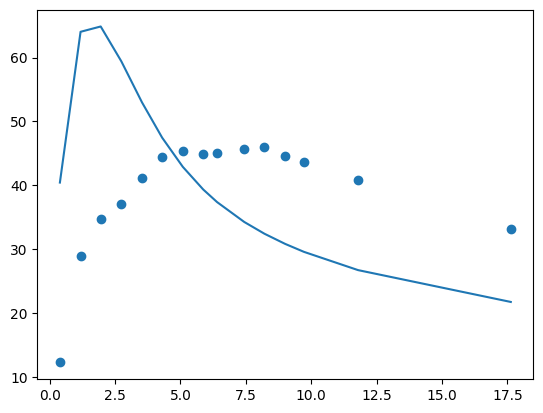

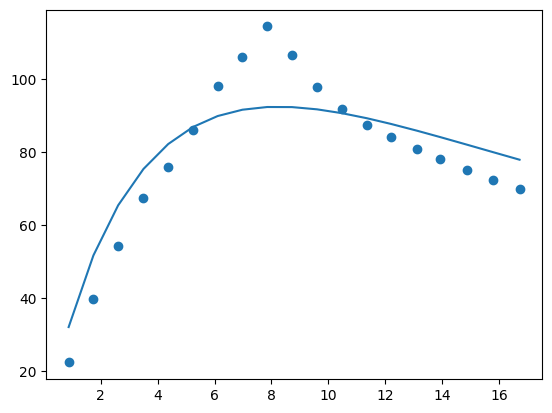

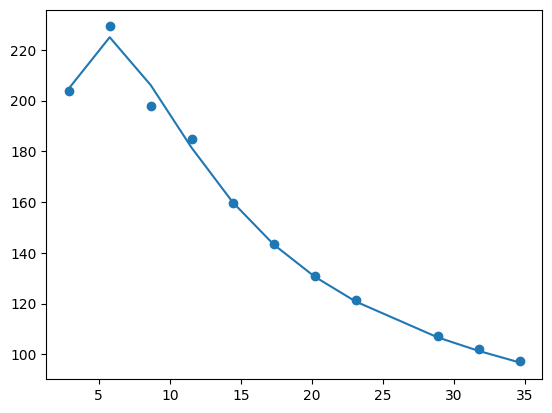

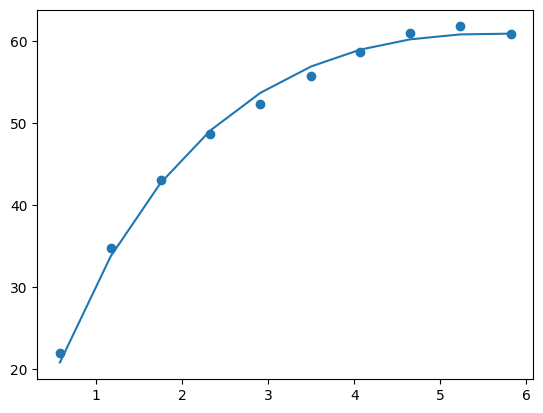

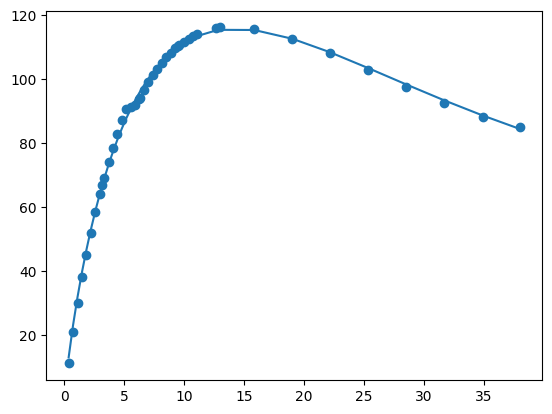

In [59]:
i=0
for gal in uniq_gal:
    dx=combined_df[combined_df['Galaxy']==gal]
    rx=dx['Rad']
    vdx=dx['Vdisk']
    rad=np.linspace(0,np.max(rx))
    plt.figure()
    plt.scatter(rx,vdx)
    plt.plot(rx,vdisk(rx*kpc,Md_fit[i],rd_fit[i]))
    i=i+1
    
    

In [25]:
rd_fit

[4.932243486645256e+20,
 1.9163636500450623e+20,
 4.134807959198432e+20,
 1.1136879069896298e+20,
 1.4491798596365822e+20,
 7.696953186520864e+20,
 4.2735020627765854e+20,
 2.3880605880857625e+20,
 1.0013454757620312e+20,
 6.015936906136431e+20,
 4.603468974269191e+20,
 6.38681858359972e+20,
 1.700188507868013e+20,
 3.622833873843517e+20,
 1.1627663222323862e+20,
 1.938486902511193e+20,
 2.0979918456371908e+20,
 2.7215998027867695e+20,
 4.4535818939834945e+20,
 6.4102887859650716e+19,
 2.1421759206621377e+20,
 3.7028130977896346e+20,
 1.7588362214500788e+20,
 1.8822633247097337e+20]

In [32]:
Md_fit

[4.286378383803915,
 4.521379139540384,
 2.8537273692043272,
 2.131884756107,
 1.503064889227705,
 10.311494198370204,
 0.4413298497694372,
 0.17153271230807413,
 0.9449750931949089,
 2.5597171441977826,
 1.0871829199163943,
 1.0533482417638562,
 0.35281333548218186,
 0.5505081523280594,
 0.15940550344599205,
 0.3933826109552498,
 12.594872273576163,
 0.03676896447627256,
 5.609732694805157,
 0.08003340914836478,
 0.18085786774819396,
 1.9181280512807937,
 0.15266089223692073,
 4.248215822424703]

In [91]:
Md

[90.54,
 80.32,
 1182.58,
 10205.4,
 313.93,
 1602.62,
 2112.66,
 160.26,
 2055.09,
 185.71,
 1999.08,
 1806.47,
 1068.64,
 2635.3,
 172.52,
 1150.35,
 922.21,
 127.3,
 86.46,
 189.16,
 121.57,
 566.02,
 395.21,
 97.46]

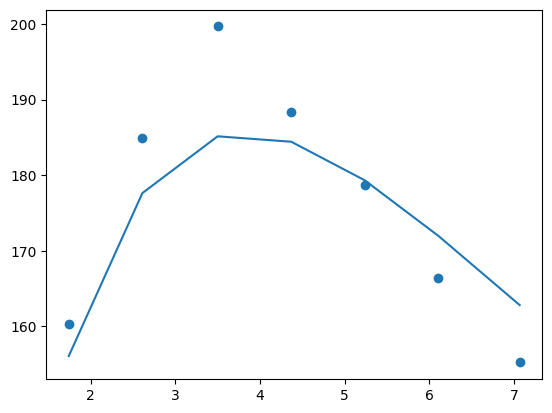

In [17]:
dx=combined_df[combined_df['Galaxy']=='NGC3949']
rx=dx['Rad']
vdx=dx['Vdisk']
rad=np.linspace(0,np.max(rx))
plt.figure()
plt.scatter(rx,vdx)
plt.plot(rx,vdisk(rx*kpc,3.879,5.47e19))